### Data Overview
`[using dummy and generated data] **as long as there is lat and long attribute**` <br />

to create the algorithm and pivot points to optimize search algorithm in database and server

In [1]:
import json

# dummy data first

'''
data json must be consist of [{...}, {...}, ..., {...},]
where the {...} consist of 
- _id: int or str
- latitude: float
- longitude: float
'''
fname = "data/generated.json"

datafile = None

try:
    with open(fname, "r") as file:
        datafile = json.load(file)

except json.JSONDecodeError as e:
    print("Failed to decode JSON:", e)

except FileNotFoundError:
    print("The file was not found.")


In [2]:
len(datafile)

90

In [3]:
type(datafile[0])

dict

In [4]:
datafile[0].keys()

dict_keys(['_id', 'index', 'guid', 'isActive', 'balance', 'picture', 'eyeColor', 'name', 'company', 'email', 'phone', 'address', 'about', 'registered', 'latitude', 'longitude', 'tags', 'friends', 'greeting', 'favoriteFruit'])

### Map data into Pandas Dataframe 

In [5]:
column_names = [
    # main attributes 
    '_id', 
    'index', 
    'latitude',
    'longitude',
    
    # optional attributes 
    'isActive',
    'address',
    'company',
    'name'
]

temp_data = {
    'uuid': [],
    'id_index': [],
    'lat': [],
    'long' : [],
    
    # optional attributes 
    'isActive' : [],
    'address' : [],
    'company' : [],
    'name': [],
    
}
for d in datafile:
    temp_data['uuid'].append(d['_id'])
    temp_data['id_index'].append(d['index'])
    temp_data['lat'].append(d['latitude'])
    temp_data['long'].append(d['longitude'])
    temp_data['isActive'].append(d['isActive'])
    temp_data['address'].append(d['address'])
    temp_data['company'].append(d['company'])
    temp_data['name'].append(d['name'])

In [6]:
import pandas as pd

df = pd.DataFrame(temp_data)

In [7]:
df.head()

,uuid,id_index,lat,long,isActive,address,company,name
0,6981e5ab90bfd5863137cb82,0,-63.295327,-162.378138,True,"754 Chapel Street, Drytown, Missouri, 4506",SURELOGIC,Patty Payne
1,6981e5abb61968844117ac0d,1,-42.649510,-90.865718,True,"255 Greenwood Avenue, Detroit, Puerto Rico, 7853",YURTURE,Santos Montoya
2,6981e5ab5cbb4f11d3c866c6,2,-33.125117,-177.386922,False,"206 Dahill Road, Sanford, Rhode Island, 6727",FUELWORKS,Bridges Rojas
3,6981e5ab247289d293fe9828,3,21.909098,-124.827490,True,"692 Amity Street, Hackneyville, West Virginia,...",EMOLTRA,Lillie Bates
4,6981e5ab0a887c8554539a5b,4,81.107503,-170.256896,True,"716 Lois Avenue, Denio, Palau, 2204",DEEPENDS,Wilkinson Reynolds


### Geopandas Data

In [8]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["long"], df["lat"]),
    crs="EPSG:4326"
)

gdf.head()

,uuid,id_index,lat,long,isActive,address,company,name,geometry
0,6981e5ab90bfd5863137cb82,0,-63.295327,-162.378138,True,"754 Chapel Street, Drytown, Missouri, 4506",SURELOGIC,Patty Payne,POINT (-162.37814 -63.29533)
1,6981e5abb61968844117ac0d,1,-42.649510,-90.865718,True,"255 Greenwood Avenue, Detroit, Puerto Rico, 7853",YURTURE,Santos Montoya,POINT (-90.86572 -42.64951)
2,6981e5ab5cbb4f11d3c866c6,2,-33.125117,-177.386922,False,"206 Dahill Road, Sanford, Rhode Island, 6727",FUELWORKS,Bridges Rojas,POINT (-177.38692 -33.12512)
3,6981e5ab247289d293fe9828,3,21.909098,-124.827490,True,"692 Amity Street, Hackneyville, West Virginia,...",EMOLTRA,Lillie Bates,POINT (-124.82749 21.9091)
4,6981e5ab0a887c8554539a5b,4,81.107503,-170.256896,True,"716 Lois Avenue, Denio, Palau, 2204",DEEPENDS,Wilkinson Reynolds,POINT (-170.2569 81.1075)


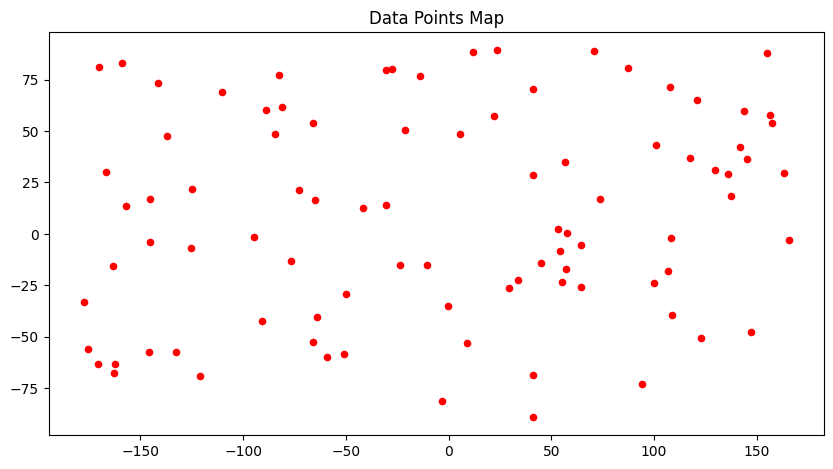

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gdf.set_crs(epsg=4326)

ax = gdf.plot(
    figsize=(10, 6),
    color="red",
    markersize=20
)

ax.set_title("Data Points Map")
plt.show()

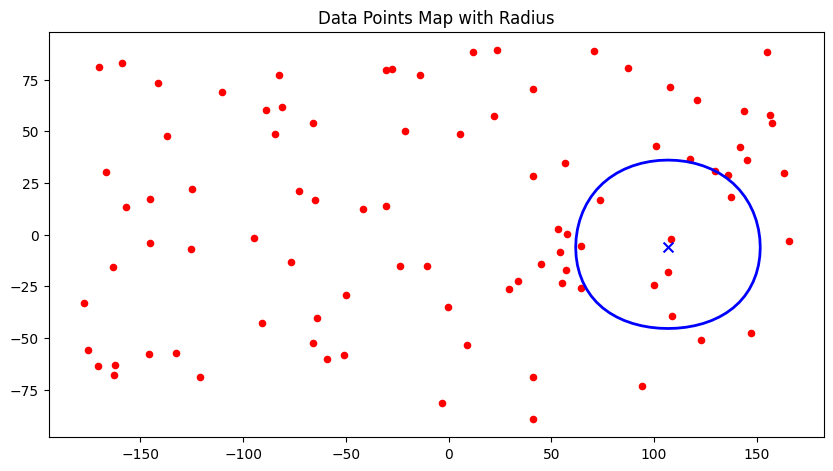

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gdf.set_crs(epsg=4326)

ax = gdf.plot(
    figsize=(10, 6),
    color="red",
    markersize=20
)

center_lat = -6.2
center_lon = 106.8
center_point = gpd.GeoSeries(
    [Point(center_lon, center_lat)],
    crs="EPSG:4326"
)
gdf_3857 = gdf.to_crs(epsg=3857)
center_3857 = center_point.to_crs(epsg=3857)

radius_km = 5000
radius_m = radius_km * 1000

circle = center_3857.buffer(radius_m)

circle_4326 = circle.to_crs(epsg=4326)
center_4326 = center_3857.to_crs(epsg=4326)


circle_4326.plot(
    ax=ax,
    facecolor="none",
    edgecolor="blue",
    linewidth=2,
    label="Radius 5000 km"
)

center_4326.plot(
    ax=ax,
    color="blue",
    markersize=50,
    marker="x",
    label="Center"
)

ax.set_title("Data Points Map with Radius")
plt.show()


### Working on Creating and Designing the Clustering Method

In [11]:
# sliding window the latitude
df['dist_next_lat'] = df['lat'].diff().abs()

# sliding window the latitude
df['dist_next_long'] = df['long'].diff().abs()

In [12]:
df.head()

,uuid,id_index,lat,long,isActive,address,company,name,dist_next_lat,dist_next_long
0,6981e5ab90bfd5863137cb82,0,-63.295327,-162.378138,True,"754 Chapel Street, Drytown, Missouri, 4506",SURELOGIC,Patty Payne,NaN,NaN
1,6981e5abb61968844117ac0d,1,-42.649510,-90.865718,True,"255 Greenwood Avenue, Detroit, Puerto Rico, 7853",YURTURE,Santos Montoya,20.645817,71.512420
2,6981e5ab5cbb4f11d3c866c6,2,-33.125117,-177.386922,False,"206 Dahill Road, Sanford, Rhode Island, 6727",FUELWORKS,Bridges Rojas,9.524393,86.521204
3,6981e5ab247289d293fe9828,3,21.909098,-124.827490,True,"692 Amity Street, Hackneyville, West Virginia,...",EMOLTRA,Lillie Bates,55.034215,52.559432
4,6981e5ab0a887c8554539a5b,4,81.107503,-170.256896,True,"716 Lois Avenue, Denio, Palau, 2204",DEEPENDS,Wilkinson Reynolds,59.198405,45.429406


In [13]:
df['dist_next_lat'].mean()

np.float64(56.387432460674155)

In [14]:
df['dist_next_long'].mean()

np.float64(118.26139937078653)

In [15]:
df['dist_next_long'].median()

np.float64(101.250844)

In [16]:
df['dist_next_lat'].median()

np.float64(48.950584)

#### Plot the data distribution and Subplot data `long and lat distance`

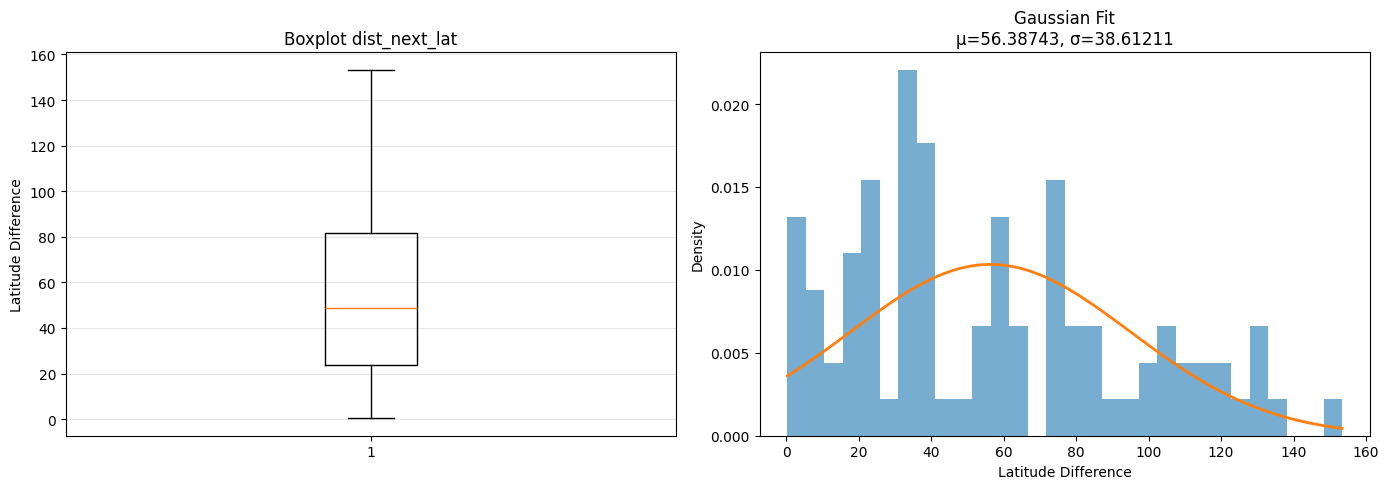

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data = df['dist_next_lat'].dropna()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].boxplot(data, vert=True, showfliers=True)
axs[0].set_title("Boxplot dist_next_lat")
axs[0].set_ylabel("Latitude Difference")
axs[0].grid(axis="y", alpha=0.3)

axs[1].hist(data, bins=30, density=True, alpha=0.6)

mu, std = norm.fit(data)

x = np.linspace(data.min(), data.max(), 100)
p = norm.pdf(x, mu, std)

axs[1].plot(x, p, linewidth=2)
axs[1].set_title(f"Gaussian Fit\nμ={mu:.5f}, σ={std:.5f}")
axs[1].set_xlabel("Latitude Difference")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

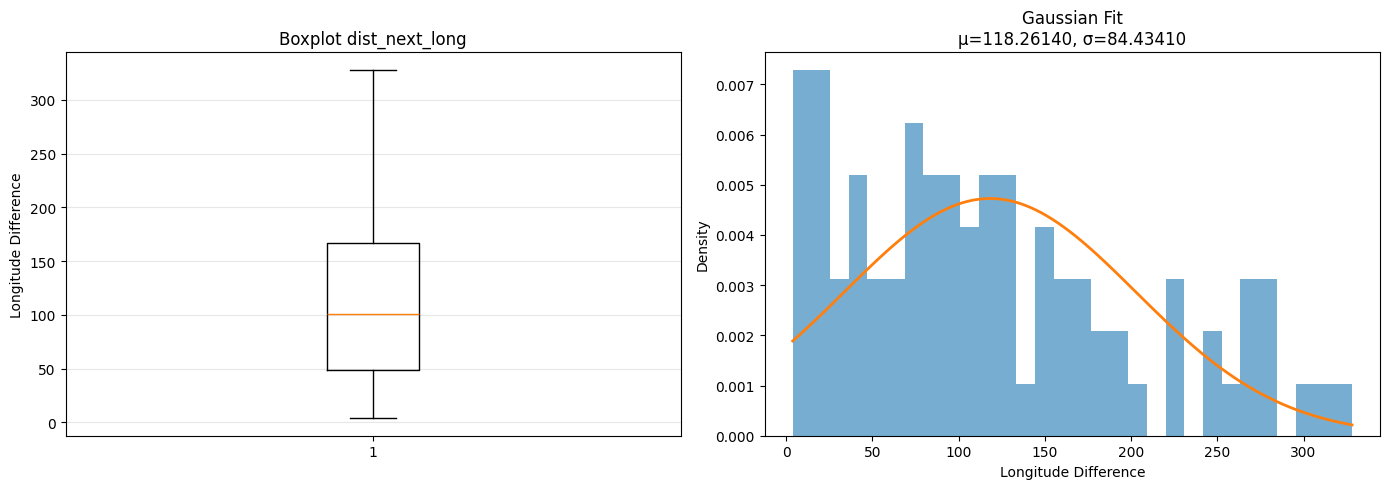

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data = df['dist_next_long'].dropna()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].boxplot(data, vert=True, showfliers=True)
axs[0].set_title("Boxplot dist_next_long")
axs[0].set_ylabel("Longitude Difference")
axs[0].grid(axis="y", alpha=0.3)

axs[1].hist(data, bins=30, density=True, alpha=0.6)

mu, std = norm.fit(data)

x = np.linspace(data.min(), data.max(), 100)
p = norm.pdf(x, mu, std)

axs[1].plot(x, p, linewidth=2)
axs[1].set_title(f"Gaussian Fit\nμ={mu:.5f}, σ={std:.5f}")
axs[1].set_xlabel("Longitude Difference")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

In [19]:
print(df['lat'].max(), df['lat'].min())
print(df['long'].max(), df['long'].min())

89.255691 -89.153062
165.523263 -177.386922


In [20]:
# find how many lat points that will be set as the center poin for the pivot center
print(f"min: {df['lat'].min()}")
for i in range(int(df['lat'].min()), int(df['lat'].max()), 60):
    print(i)
print(f"max: {df['lat'].max()}")

'''
min: -89.153062
-89
-29
31
max: 89.255691
'''

# take -89, -29, 31, 89

min: -89.153062
-89
-29
31
max: 89.255691


'\nmin: -89.153062\n-89\n-29\n31\nmax: 89.255691\n'

In [21]:
# find how many long points that will be set as the center poin for the pivot center

print(f"min: {df['long'].min()}")
for i in range(int(df['long'].min()), int(df['long'].max()), 60):
    print(i)
print(f"max: {df['long'].max()}")

'''
min: -177.386922
-177
-117
-57
3
63
123
max: 165.523263
'''

# take -177, -57, 3, 63, 123

min: -177.386922
-177
-117
-57
3
63
123
max: 165.523263


'\nmin: -177.386922\n-177\n-117\n-57\n3\n63\n123\nmax: 165.523263\n'

#### Check The Circle Radius Coverage **[FFAILED]**
`BECAUSE NEED EXTRA STUFF TO DO GUARANTEE THAT ALL POINTS WILL BE COVERAGE`

In [22]:
lats = [-89, -29, 31, 89]
longs = [-177, -57, 3, 63, 123]

coverage_res = []

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius bumi (km)

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

def do_coverage(row, dist=5000):
    coverage_res = []

    point_lat = row['lat']
    point_lon = row['long']

    for lat in lats:
        for lon in longs:
            d = haversine(point_lat, point_lon, lat, lon)
            if d <= dist:
                coverage_res.append({
                    "center_lat": lat,
                    "center_lon": lon,
                    "dist_km": d
                })

    return coverage_res
        

In [23]:
df['circle_coverage'] = df.apply(do_coverage, axis=1)

df

,uuid,id_index,lat,long,isActive,address,company,name,dist_next_lat,dist_next_long,circle_coverage
0,6981e5ab90bfd5863137cb82,0,-63.295327,-162.378138,True,"754 Chapel Street, Drytown, Missouri, 4506",SURELOGIC,Patty Payne,NaN,NaN,"[{'center_lat': -89, 'center_lon': -177, 'dist..."
1,6981e5abb61968844117ac0d,1,-42.649510,-90.865718,True,"255 Greenwood Avenue, Detroit, Puerto Rico, 7853",YURTURE,Santos Montoya,20.645817,71.512420,"[{'center_lat': -29, 'center_lon': -57, 'dist_..."
2,6981e5ab5cbb4f11d3c866c6,2,-33.125117,-177.386922,False,"206 Dahill Road, Sanford, Rhode Island, 6727",FUELWORKS,Bridges Rojas,9.524393,86.521204,"[{'center_lat': -29, 'center_lon': -177, 'dist..."
3,6981e5ab247289d293fe9828,3,21.909098,-124.827490,True,"692 Amity Street, Hackneyville, West Virginia,...",EMOLTRA,Lillie Bates,55.034215,52.559432,[]
4,6981e5ab0a887c8554539a5b,4,81.107503,-170.256896,True,"716 Lois Avenue, Denio, Palau, 2204",DEEPENDS,Wilkinson Reynolds,59.198405,45.429406,"[{'center_lat': 89, 'center_lon': -177, 'dist_..."
...,...,...,...,...,...,...,...,...,...,...,...
85,6981e5ab34e9ac386c406b92,85,-23.660634,55.455160,False,"360 Beacon Court, Caron, Connecticut, 5316",NETUR,Ella Burke,21.369570,52.944309,"[{'center_lat': -29, 'center_lon': 63, 'dist_k..."
86,6981e5ab9dcf84c38eaa7631,86,48.439099,-84.389108,False,"947 Etna Street, Cannondale, Delaware, 6592",CUJO,Dina Lambert,72.099733,139.844268,"[{'center_lat': 31, 'center_lon': -57, 'dist_k..."
87,6981e5ab47ef8413cdc13158,87,-81.476213,-3.249648,True,"418 Lafayette Walk, Cade, Oklahoma, 7735",BRAINCLIP,Sherrie Fowler,129.915312,81.139460,"[{'center_lat': -89, 'center_lon': -177, 'dist..."
88,6981e5ab8f9651b41fbd2409,88,-69.068917,-121.105017,True,"410 Aviation Road, Greenock, New York, 258",DREAMIA,Macias Carney,12.407296,117.855369,"[{'center_lat': -89, 'center_lon': -177, 'dist..."


In [24]:
df[df['circle_coverage'].apply(len) == 0]

,uuid,id_index,lat,long,isActive,address,company,name,dist_next_lat,dist_next_long,circle_coverage
3,6981e5ab247289d293fe9828,3,21.909098,-124.827490,True,"692 Amity Street, Hackneyville, West Virginia,...",EMOLTRA,Lillie Bates,55.034215,52.559432,[]
51,6981e5ab209fe2658d709669,51,-1.626194,-94.573606,False,"351 Cedar Street, Duryea, Utah, 5106",HOTCAKES,Carter Shaw,1.795550,152.067476,[]
60,6981e5ab93729ded36b8971e,60,-6.968082,-125.272817,True,"339 Anchorage Place, Hemlock, Rhode Island, 3627",EXTRAGEN,Kristine Bailey,72.202087,246.365218,[]


#### Check The Grid Area Coverage

In [25]:
lat_bins = [(-90, 0), (0, 90)]
lon_bins = [
    (-180, -90), (-90, 0), 
    (0, 90), (90, 180)
]

grid_area_lists = []

area_id = 1
for lat_min, lat_max in lat_bins:
    for lon_min, lon_max in lon_bins:
        grid_area_lists.append({
            "name": f"AREA {area_id}",
            "lat_min": lat_min,
            "lat_max": lat_max,
            "lon_min": lon_min,
            "lon_max": lon_max,
        })
        area_id += 1


In [26]:
len(grid_area_lists)

8

In [27]:
def under_the_area(point_lat, point_lon, area):
    isUnder = (
        area["lat_min"] <= point_lat < area["lat_max"] and
        area["lon_min"] <= point_lon < area["lon_max"]
    )

    center_lat = (area["lat_min"] + area["lat_max"]) / 2
    center_lon = (area["lon_min"] + area["lon_max"]) / 2

    dlat = point_lat - center_lat
    dlon = point_lon - center_lon

    return isUnder, dlat, dlon


In [28]:
def do_coverage(row):
    coverage_res = []

    point_lat = row['lat']
    point_lon = row['long']

    for area in grid_area_lists:
        isUnder, dlat, dlong = under_the_area(
            point_lat,
            point_lon,
            area
        )

        if isUnder:
            coverage_res.append({
                "area": area["name"],
                "lat_min": area["lat_min"],
                "lat_max": area["lat_max"],
                "lon_min": area["lon_min"],
                "lon_max": area["lon_max"],
                "delta_lat": round(dlat, 4),
                "delta_long": round(dlong, 4),
            })
    print(coverage_res)
    return coverage_res


In [29]:
df['grid_coverage'] = df.apply(do_coverage, axis=1)

df

[{'area': 'AREA 1', 'lat_min': -90, 'lat_max': 0, 'lon_min': -180, 'lon_max': -90, 'delta_lat': -18.2953, 'delta_long': -27.3781}]
[{'area': 'AREA 1', 'lat_min': -90, 'lat_max': 0, 'lon_min': -180, 'lon_max': -90, 'delta_lat': 2.3505, 'delta_long': 44.1343}]
[{'area': 'AREA 1', 'lat_min': -90, 'lat_max': 0, 'lon_min': -180, 'lon_max': -90, 'delta_lat': 11.8749, 'delta_long': -42.3869}]
[{'area': 'AREA 5', 'lat_min': 0, 'lat_max': 90, 'lon_min': -180, 'lon_max': -90, 'delta_lat': -23.0909, 'delta_long': 10.1725}]
[{'area': 'AREA 5', 'lat_min': 0, 'lat_max': 90, 'lon_min': -180, 'lon_max': -90, 'delta_lat': 36.1075, 'delta_long': -35.2569}]
[{'area': 'AREA 6', 'lat_min': 0, 'lat_max': 90, 'lon_min': -90, 'lon_max': 0, 'delta_lat': -28.4612, 'delta_long': -20.0866}]
[{'area': 'AREA 3', 'lat_min': -90, 'lat_max': 0, 'lon_min': 0, 'lon_max': 90, 'delta_lat': 39.316, 'delta_long': 19.6175}]
[{'area': 'AREA 8', 'lat_min': 0, 'lat_max': 90, 'lon_min': 90, 'lon_max': 180, 'delta_lat': -16.1497,

,uuid,id_index,lat,long,isActive,address,company,name,dist_next_lat,dist_next_long,circle_coverage,grid_coverage
0,6981e5ab90bfd5863137cb82,0,-63.295327,-162.378138,True,"754 Chapel Street, Drytown, Missouri, 4506",SURELOGIC,Patty Payne,NaN,NaN,"[{'center_lat': -89, 'center_lon': -177, 'dist...","[{'area': 'AREA 1', 'lat_min': -90, 'lat_max':..."
1,6981e5abb61968844117ac0d,1,-42.649510,-90.865718,True,"255 Greenwood Avenue, Detroit, Puerto Rico, 7853",YURTURE,Santos Montoya,20.645817,71.512420,"[{'center_lat': -29, 'center_lon': -57, 'dist_...","[{'area': 'AREA 1', 'lat_min': -90, 'lat_max':..."
2,6981e5ab5cbb4f11d3c866c6,2,-33.125117,-177.386922,False,"206 Dahill Road, Sanford, Rhode Island, 6727",FUELWORKS,Bridges Rojas,9.524393,86.521204,"[{'center_lat': -29, 'center_lon': -177, 'dist...","[{'area': 'AREA 1', 'lat_min': -90, 'lat_max':..."
3,6981e5ab247289d293fe9828,3,21.909098,-124.827490,True,"692 Amity Street, Hackneyville, West Virginia,...",EMOLTRA,Lillie Bates,55.034215,52.559432,[],"[{'area': 'AREA 5', 'lat_min': 0, 'lat_max': 9..."
4,6981e5ab0a887c8554539a5b,4,81.107503,-170.256896,True,"716 Lois Avenue, Denio, Palau, 2204",DEEPENDS,Wilkinson Reynolds,59.198405,45.429406,"[{'center_lat': 89, 'center_lon': -177, 'dist_...","[{'area': 'AREA 5', 'lat_min': 0, 'lat_max': 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...
85,6981e5ab34e9ac386c406b92,85,-23.660634,55.455160,False,"360 Beacon Court, Caron, Connecticut, 5316",NETUR,Ella Burke,21.369570,52.944309,"[{'center_lat': -29, 'center_lon': 63, 'dist_k...","[{'area': 'AREA 3', 'lat_min': -90, 'lat_max':..."
86,6981e5ab9dcf84c38eaa7631,86,48.439099,-84.389108,False,"947 Etna Street, Cannondale, Delaware, 6592",CUJO,Dina Lambert,72.099733,139.844268,"[{'center_lat': 31, 'center_lon': -57, 'dist_k...","[{'area': 'AREA 6', 'lat_min': 0, 'lat_max': 9..."
87,6981e5ab47ef8413cdc13158,87,-81.476213,-3.249648,True,"418 Lafayette Walk, Cade, Oklahoma, 7735",BRAINCLIP,Sherrie Fowler,129.915312,81.139460,"[{'center_lat': -89, 'center_lon': -177, 'dist...","[{'area': 'AREA 2', 'lat_min': -90, 'lat_max':..."
88,6981e5ab8f9651b41fbd2409,88,-69.068917,-121.105017,True,"410 Aviation Road, Greenock, New York, 258",DREAMIA,Macias Carney,12.407296,117.855369,"[{'center_lat': -89, 'center_lon': -177, 'dist...","[{'area': 'AREA 1', 'lat_min': -90, 'lat_max':..."


### Create The Data Splitter

In [30]:
from collections import defaultdict

def build_grid_index(lat_bins, lon_bins):
    grid = []

    area_id = 1

    for lat_min, lat_max in lat_bins:
        for lon_min, lon_max in lon_bins:
            grid.append({
                "index": f"Area_{area_id}",
                "minimum-latitude": lat_min,
                "maximum-latitude": lat_max,
                "minimum-longitude": lon_min,
                "maximum-longitude": lon_max,
            })
            area_id += 1

    return grid


def find_grid(lat, lon, grid):
    for area in grid:
        if (
            (
                area["minimum-latitude"] <= lat
                and
                lat < area["maximum-latitude"]
            )
            and
            (
                area["minimum-longitude"] <= lon
                and
                lon < area["maximum-longitude"]
            )
        ):
            return area["index"]
    else:
        return None


def data_splitter(data_list, grid):
    data_container = defaultdict(list)

    for data in data_list:
        lat = data["latitude"]
        lon = data["longitude"]
        area = find_grid(lat, lon, grid)

        if area:
            data_container[area].append(data)
        else:
            data_container["OOB"].append(data)

    return dict(data_container)

In [31]:
# latitude and longitude boundaries 

lat_bins = [(-90, -30), (-30, 30), (30, 90)]
lon_bins = [
    (-180, -120), (-120, -60), (-60, 0),
    (0, 60), (60, 120), (120, 180)
]

GRID = build_grid_index(lat_bins, lon_bins)

In [32]:
len(GRID)

18

In [33]:
data_splited = data_splitter(datafile, GRID)

In [34]:
data_splited.keys()

dict_keys(['Area_1', 'Area_2', 'Area_7', 'Area_13', 'Area_8', 'Area_11', 'Area_12', 'Area_10', 'Area_14', 'Area_16', 'Area_18', 'Area_3', 'Area_17', 'Area_9', 'Area_4', 'Area_15', 'Area_5', 'Area_6'])

### Create Data Splitter Converter Into JSON so WE can Just Insert the data

In [35]:

import json

def convert(data, name):
    try:
        with open(name, 'w', encoding='utf-8') as f:
            json.dump(data, f, indent=4)
            print(f"JSON in FILE {name} created!!")
    except Exception as E:
        print(f"Error happened {str(E)}")

def convert_all_data_container(data_splited):
    file_names = []
    for k, item in data_splited.items():
        fname = f"./data/{k}.json"
        convert(item, name=fname)
        file_names.append(fname)
    
    return file_names

In [36]:
convert_all_data_container(data_splited)

JSON in FILE ./data/Area_1.json created!!
JSON in FILE ./data/Area_2.json created!!
JSON in FILE ./data/Area_7.json created!!
JSON in FILE ./data/Area_13.json created!!
JSON in FILE ./data/Area_8.json created!!
JSON in FILE ./data/Area_11.json created!!
JSON in FILE ./data/Area_12.json created!!
JSON in FILE ./data/Area_10.json created!!
JSON in FILE ./data/Area_14.json created!!
JSON in FILE ./data/Area_16.json created!!
JSON in FILE ./data/Area_18.json created!!
JSON in FILE ./data/Area_3.json created!!
JSON in FILE ./data/Area_17.json created!!
JSON in FILE ./data/Area_9.json created!!
JSON in FILE ./data/Area_4.json created!!
JSON in FILE ./data/Area_15.json created!!
JSON in FILE ./data/Area_5.json created!!
JSON in FILE ./data/Area_6.json created!!


['./data/Area_1.json',
 './data/Area_2.json',
 './data/Area_7.json',
 './data/Area_13.json',
 './data/Area_8.json',
 './data/Area_11.json',
 './data/Area_12.json',
 './data/Area_10.json',
 './data/Area_14.json',
 './data/Area_16.json',
 './data/Area_18.json',
 './data/Area_3.json',
 './data/Area_17.json',
 './data/Area_9.json',
 './data/Area_4.json',
 './data/Area_15.json',
 './data/Area_5.json',
 './data/Area_6.json']

## Implementation Of 
`How Using The Class Clustering Data`

In [37]:
# class from the ./version/module.py
import json
from collections import defaultdict
import pandas as pd
import pymongo

class DataSplitter:
    def __init__(
        self,
    ):
        # may be this is not nescesary at all
        self.dataSplited = None

        self.LAT_BINS = [(-90, -30), (-30, 30), (30, 90)]
        self.LON_BINS = [
            (-180, -120), (-120, -60), (-60, 0),
            (0, 60), (60, 120), (120, 180)
        ]

        self.GRID = self.build_grid_index(self.LAT_BINS, self.LON_BINS)

    def build_grid_index(self, lat_bins, lon_bins):
        grid = []

        area_id = 1

        for lat_min, lat_max in lat_bins:
            for lon_min, lon_max in lon_bins:
                grid.append({
                    "index": f"Area_{area_id}",
                    "minimum_latitude": lat_min,
                    "maximum_latitude": lat_max,
                    "minimum_longitude": lon_min,
                    "maximum_longitude": lon_max,
                })
                area_id += 1

        return grid

    def find_grid(self, lat, lon, grid):
        for area in grid:
            if (
                (
                    area["minimum_latitude"] <= lat
                    and
                    lat < area["maximum_latitude"]
                )
                and
                (
                    area["minimum_longitude"] <= lon
                    and
                    lon < area["maximum_longitude"]
                )
            ):
                return area["index"]
        else:
            return None

    def data_splitter(self, data_list, grid):
        data_container = defaultdict(list)

        for data in data_list:
            lat = data["latitude"]
            lon = data["longitude"]
            area = self.find_grid(lat, lon, grid)

            if area:
                data_container[area].append(data)
            else:
                data_container["OOB"].append(data)

        return dict(data_container)

    def convert(self, data, name):
        try:
            with open(name, 'w', encoding='utf-8') as f:
                json.dump(data, f, indent=4)
                print(f"JSON in FILE {name} created!!")
        except Exception as E:
            print(f"Error happened {str(E)}")

    def convert_all_data_container(self, data_splited):
        for k, item in data_splited.items():
            self.convert(item, name=f"./data/{k}.json")

    # incase the data loaded as the pandas dataframe
    def CSV2JSON_Convert(self, dataframe):
        json_data = dataframe.to_json(orientation="records", indent=4)
        json_data = json.loads(json_data)
        return json_data

    def UploadToDatabase(
        self, 
        DB_URI, DB_NAME, 
        COLLECTION_NAME, data_list
    ):
        try:
            client = pymongo.MongoClient(DB_URI)

            db = client[DB_NAME]

            collection = db[COLLECTION_NAME]

            collection.insert_many(data_list)

            print(
                f"Data stored in DB: {DB_NAME}, Collection: {COLLECTION_NAME}"
            )

        except Exception as E:
            print(f"Error happened: {str(E)}")


    def runSplit(self, dataJSON):
        grid = self.GRID
        data_splited = self.data_splitter(dataJSON, grid)
        self.result_files = self.convert_all_data_container(data_splited)
        self.dataSplited = data_splited
    
    def UploadData(self, DB_URI, DB_NAME):
        res_temp = []
        for k, item in self.dataSplited.items():
            self.UploadToDatabase(DB_URI, DB_NAME, k, item)
            res_temp.append({"DB_NAME": DB_NAME, "COL_NAME": k})
            
    

In [38]:
spliter = DataSplitter()

In [39]:
# dummy data first

'''
data json must be consist of [{...}, {...}, ..., {...},]
where the {...} consist of 
- _id: int or str
- latitude: float
- longitude: float
'''
fname = "data/generated.json"

datafile = None

try:
    with open(fname, "r") as file:
        datafile = json.load(file)

except json.JSONDecodeError as e:
    print("Failed to decode JSON:", e)

except FileNotFoundError:
    print("The file was not found.")


In [40]:
spliter.runSplit(datafile)

JSON in FILE ./data/Area_1.json created!!
JSON in FILE ./data/Area_2.json created!!
JSON in FILE ./data/Area_7.json created!!
JSON in FILE ./data/Area_13.json created!!
JSON in FILE ./data/Area_8.json created!!
JSON in FILE ./data/Area_11.json created!!
JSON in FILE ./data/Area_12.json created!!
JSON in FILE ./data/Area_10.json created!!
JSON in FILE ./data/Area_14.json created!!
JSON in FILE ./data/Area_16.json created!!
JSON in FILE ./data/Area_18.json created!!
JSON in FILE ./data/Area_3.json created!!
JSON in FILE ./data/Area_17.json created!!
JSON in FILE ./data/Area_9.json created!!
JSON in FILE ./data/Area_4.json created!!
JSON in FILE ./data/Area_15.json created!!
JSON in FILE ./data/Area_5.json created!!
JSON in FILE ./data/Area_6.json created!!


In [41]:
spliter.dataSplited.keys()

dict_keys(['Area_1', 'Area_2', 'Area_7', 'Area_13', 'Area_8', 'Area_11', 'Area_12', 'Area_10', 'Area_14', 'Area_16', 'Area_18', 'Area_3', 'Area_17', 'Area_9', 'Area_4', 'Area_15', 'Area_5', 'Area_6'])

In [45]:
from dotenv import load_dotenv
import os

load_dotenv()

DB_URI = os.getenv("MONGODB_URI_CONNECTION")

In [44]:
spliter.UploadData(DB_URI=DB_URI, DB_NAME="hydrolab-database-v0")

Data stored in DB: hydrolab-database-v0, Collection: Area_1
Data stored in DB: hydrolab-database-v0, Collection: Area_2
Data stored in DB: hydrolab-database-v0, Collection: Area_7
Data stored in DB: hydrolab-database-v0, Collection: Area_13
Data stored in DB: hydrolab-database-v0, Collection: Area_8
Data stored in DB: hydrolab-database-v0, Collection: Area_11
Data stored in DB: hydrolab-database-v0, Collection: Area_12
Data stored in DB: hydrolab-database-v0, Collection: Area_10
Data stored in DB: hydrolab-database-v0, Collection: Area_14
Data stored in DB: hydrolab-database-v0, Collection: Area_16
Data stored in DB: hydrolab-database-v0, Collection: Area_18
Data stored in DB: hydrolab-database-v0, Collection: Area_3
Data stored in DB: hydrolab-database-v0, Collection: Area_17
Data stored in DB: hydrolab-database-v0, Collection: Area_9
Data stored in DB: hydrolab-database-v0, Collection: Area_4
Data stored in DB: hydrolab-database-v0, Collection: Area_15
Data stored in DB: hydrolab-dat